In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
url = '~/Downloads/Data_for_UCI_named.csv'

In [37]:
df = pd.read_csv(url)

In [38]:
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [39]:
#!pip install xgboost

In [40]:
#!pip install lightgbm

In [41]:
df = df.drop(columns=['stab'])

In [42]:
X = df.drop(columns = ['stabf'])
Y = df['stabf']

In [43]:
#split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [44]:
# Transforming the dataset using standard scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_df = scaler.fit_transform(x_train)
x_train_df = pd.DataFrame(x_train_df, columns=x_train.columns)

#y_train_df = scaler.fit_transform(y_train)
#y_train_df = pd.DataFrame(y_train_df)

x_test_df = scaler.fit_transform(x_test)
x_test_df = pd.DataFrame(x_test_df, columns=x_test.columns)


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
# define dataset
# define the model
XG_model = XGBClassifier(random_state=1)
XG_model = XG_model.fit(x_train_df, y_train)

accuracy = accuracy_score(y_true=y_test, y_pred = XG_model.predict(x_test_df))
print('Accuracy: {}'.format(round(accuracy, 4))) #
accuracy

/home/uthmani/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/uthmani/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:51:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.946


0.946

In [46]:
from lightgbm import LGBMClassifier
# define dataset
# define the model
LG_model = LGBMClassifier(random_state=1)
# fit the model on the whole dataset
LG_model = LG_model.fit(x_train_df, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred = LG_model.predict(x_test_df))
print('Accuracy: {}'.format(round((accuracy),4)))

Accuracy: 0.9365


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

#from sklearn.datasets import make_classification
#X, y = make_classification(n_features=4, random_state=0)
XTmodel = ExtraTreesClassifier(random_state = 1)
model_params = {
    # list of n_estimators to select from
    'n_estimators': [100, 300, 500, 1000],
    # min_samples_leaf list to select from
    'min_samples_leaf': [6, 8, 4],
    # list of min_sample_split and max_features to select from based on the question 
    'min_samples_split': [2,5,7],
    
    'max_features': ['auto', None, 'log2']
}


RSV = RandomizedSearchCV(XTmodel, model_params, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1,random_state=1)
search = RSV.fit(x_train_df, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [48]:
# Best Hyperparameters according to the randomized search CV

search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [69]:
# Optimal ExtraTreesClassifier
OXTmodel = ExtraTreesClassifier(random_state = 1, bootstrap= False,
                                 ccp_alpha = 0.0,
                                 class_weight= None,
                                 criterion= 'gini',
                                 max_depth= None,
                                 max_features= None,
                                 max_leaf_nodes= None,
                                 max_samples= None,
                                 min_impurity_decrease= 0.0,
                                 min_samples_leaf= 4,
                                 min_samples_split= 5,
                                 min_weight_fraction_leaf= 0.0,
                                 n_estimators= 500,
                                 n_jobs= None,
                                 oob_score= False,
                                 verbose= 0,
                                 warm_start= False )


In [70]:
# optimal ExtraTreesClassifier accuracy score

OXTmodel = OXTmodel.fit(x_train_df, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred = OXTmodel.predict(x_test_df))
print('Accuracy: {}'.format(round((accuracy),4)))

# I tried calculating the accuracies for all the options in the question but none gives a better accuracy score as the Hyperparameter combination I got

Accuracy: 0.935


In [59]:
# initial ExtraTreesClassifier accuracy score without hyperparameter tuning

XTmodel = XTmodel.fit(x_train_df, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred = XTmodel.predict(x_test_df))
print('Accuracy: {}'.format(round((accuracy),4)))

Accuracy: 0.926


[0.13312272 0.13505643 0.13015047 0.13023924 0.0082835  0.01087562
 0.0109557  0.01028787 0.10299321 0.10780024 0.11179932 0.10843569]


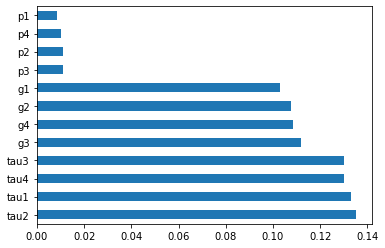

In [58]:
# most important features using the optimal ExtraTreesClassifier model
import matplotlib.pyplot as plt

print(OXTmodel.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(OXTmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

# from the graph below tau2 is the most important feature and p1 is the least important feature

In [60]:
#Random forest classifier 

from sklearn.ensemble import RandomForestClassifier

RFCmodel = RandomForestClassifier(random_state=1)
RFCmodel = RFCmodel.fit(x_train_df, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred = RFCmodel.predict(x_test_df))
print('Accuracy: {}'.format(round(accuracy,4)))

Accuracy: 0.928
